# A K-Prototypes Case Study 

## Erik Case

In [3]:

from IPython.display import HTML

## Why Cluster?

Keep in mind that humans constantly and automatically cluster with the sensory data we ingest every day.
You are constantly categorizing like objects and phenomena that you see, hear, smell and taste every day.
<br>The task gets extremely difficult when you are trying to group many rows (observations) and many features (columns).  The mind isn't able to automatically do the same with a data set of any meaningful size.
<br>_"Efficient partitioning of large data sets into homogeneous clusters is a fundamental problem in  data mining" -Huang, 1997_
<br>Similar to many tasks of machine learning, clustering aims to mimic the mind's process, but formally and on a larger scale.

<img src="one_of_these_things.png">



### Some Practical Business Applications of Row-Wise Unsupervised Learning




#### 1.  Initial Exploratory Data Analysis/Reporting: How many naturally occurring groups exist within the data?
<br> a. Helpful for first pass analysis of data where the idea is to find the 'like' groups that exist in the data
<br> b. Research question may be something vague like "We want to get a feel for the data."
<br> c. This should be in the EDA toolkit of every analyst because it is a LESS ARBITRARY method of categorizing things than, say:
<br> i Cut all observations up into thirds based on one variable and call it "Low/Medium/High"
<br> ii. Cutting things into deciles (I hate this)
<br> iii. Look at (low spend + high frequency) vs (high spend + high frequency)  vs (low spend + low frequency) vs (high spend + low frequency) customer quadrants 
<br> iv. Pure Domain knowledge alone - "I noticed that people generally above this threshold tend to behave differently from other groups"

<br>Note that some of the traditional ways of partitioning up a dataset are based on one or two metrics tops

#### 2.  Feature engineering  for a model that will eventually include a target/independent variable 
_a. Interestingly, when you are assigning cluster membership to row-wise observations, you have essentially  engineered a new, condensed and discrete representation of your feature set._ 

_b. In that way, row-wise clustering actually has some of the effective characteristics of columnwise clustering. By paritioning the rows into discrete groups, you have mapped multiple columns into a single feature_

#### 3.  Target engineering 
 _Once natural categories have been detected in the data, can I then use them as my Y and predict future membership in that cluster?_

### Some Practical Business Applications of Row-Wise Unsupervised Learning



#### 1.  Initial Exploratory Analysis: How many naturally occurring groups exist within the data?
##### a. Helpful for first pass analysis of data where the idea is to find the 'like' groups that exist in the data
##### b. Research question may be something vague like "We want to get a feel for the data."
##### c. This should be in you EDA toolkit because it is LESS ARBITRARY method of categorizing things than, say:
###### i. Hey just cut all observations up into thirds based on one variable and call it "Low/Medium/High"
###### ii. Cutting things into deciles (I hate this)
#####  iii. Pure Domain knolwdge alone

Some of the ab


    
   
#### 2.  Feature engineering  for a model that will eventually include a target/independent variable 
_a. Interestingly, when you are assigning cluster membership to row-wise observations, you have essentially  engineered a new, condensed and discrete representation of your feature set._ 

_b. In that way, row-wise clustering actually has some of the effective characteristics of columnwise clustering. By paritioning the rows into discrete groups, you have mapped multiple columns into a single feature_

#### 3.  Target engineering 
 _Once natural categories have been detected in the data, can I then use them as my Y and predict future membership in that cluster?_

## Traditional K-Means Algorithm

#### Goal: I want to partition my data set into _'k'_ number of clusters. The clusters should be the 'most' same internally and 'most different' _from each other_

 _How do we measure internal homegenity and external separation (aka 'distance')?
 The goal, more formally out, is to find the means of 'k' clusters (centroids) such that we minimize the within cluster Euclidean distance for a given number of 'k' clusters_ :


<img src="minimize_within_cluster_variance.png">
Luckily, minimizing the within cluster

In [ ]:
from scipy.spatial import distance




X = np.array([[1, 2],
              [4, 6],
              [2, 5 ],
              [20, 25],
              [20, 30],
              [30, 40] ])

plt.scatter(X[:,0], X[:,1], s=150)
plt.show()


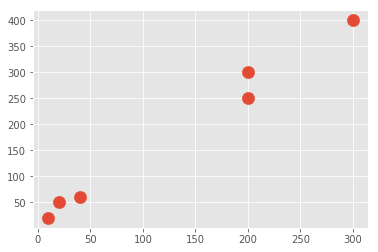

In [45]:
from scipy.spatial import distance




X = np.array([[10, 20],
              [40, 60],
              [20, 50 ],
              [200, 250],
              [200, 300],
              [300, 400] ])

plt.scatter(X[:,0], X[:,1], s=150)
plt.show()


In [6]:
# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/BVFG7fd1H30" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>')

In [ ]:
Sources: 
    https://pythonprogramming.net/k-means-from-scratch-machine-learning-tutorial/
        https://pdfs.semanticscholar.org/d42b/b5ad2d03be6d8fefa63d25d02c0711d19728.pdf
            https://support.minitab.com/en-us/minitab/18/help-and-how-to/modeling-statistics/multivariate/how-to/cluster-k-means/interpret-the-results/all-statistics-and-graphs/
                